In [114]:
from keras.models import Model
from keras.layers import Dense, Input, LeakyReLU
from keras.callbacks import TensorBoard
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
import keras
import numpy as np
import matplotlib.pyplot as plt
log_dir = "./logs"  # Saving TensorBoard logs to logs dir 
data_n = int(1e2) # number of samples
# batch_size = 32
for i in range(100):
    if 2**i > data_n:
        batch_size = 2**(i-1)
        break
print(batch_size)
learning_rate = 1e-2
epoch_n = 64
depth = 8
scale = 32
layer_size = 32 # out = Dense(layer_size)(in)
x_train = np.random.rand(data_n, 1, 1) * scale # Random data in (0, 1)
y_train = x_train
x_val = np.random.rand(data_n//4, 1, 1) * scale
y_val = x_val

64


In [115]:
# Checking shapes for validation
print(x_val.shape)
print(x_train.shape)

(25, 1, 1)
(100, 1, 1)


In [116]:
def DNN_IO(input_shape):
    inputs = Input(input_shape)
    dnn = Dense(layer_size,
               )(inputs)
    for _ in range(depth):
        dnn = Dense(layer_size,
                    activation="relu",
                   )(dnn)
#         dnn = LeakyReLU()(dnn)
        dnn = BatchNormalization()(dnn)
    outputs = Dense(1)(dnn)
    return inputs, outputs

def ResNet_IO(input_shape):
    inputs, outputs = DNN_IO(input_shape)
    outputs_res = keras.layers.add([inputs, outputs])
    return inputs, outputs_res

def DNN(input_shape):
    return CompileModel(*DNN_IO(input_shape))

def ResNet(input_shape):
    return CompileModel(*ResNet_IO(input_shape))

def CompileModel(inputs, outputs):
    model = Model(inputs, outputs)
    model.compile(loss='mean_squared_error',
#                   optimizer=Adam(lr=learning_rate),
                  optimizer=SGD(lr=learning_rate),
                  metrics=['mae'])
    return model

def FitModel(model):
    return model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epoch_n,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

input_shape = (1, 1)
model = DNN(input_shape)
model_res = ResNet(input_shape)
tensorboard = TensorBoard(log_dir)
callbacks = [tensorboard, ]
history = FitModel(model)
history_res = FitModel(model_res)

Train on 100 samples, validate on 25 samples
Epoch 1/64
100/100 [==============================] - 1s 11ms/step - loss: 390.2379 - mae: 17.7195 - val_loss: 29606.0469 - val_mae: 149.3301
Epoch 2/64
100/100 [==============================] - 0s 189us/step - loss: 321.7270 - mae: 15.8722 - val_loss: 5304.7285 - val_mae: 65.3991
Epoch 3/64
100/100 [==============================] - 0s 199us/step - loss: 180.3242 - mae: 12.3670 - val_loss: 7496.4375 - val_mae: 78.5814
Epoch 4/64
100/100 [==============================] - 0s 209us/step - loss: 52.7408 - mae: 6.8238 - val_loss: 6681.1465 - val_mae: 74.4435
Epoch 5/64
100/100 [==============================] - 0s 199us/step - loss: 8.1942 - mae: 2.4111 - val_loss: 5635.4146 - val_mae: 67.7124
Epoch 6/64
100/100 [==============================] - 0s 219us/step - loss: 2.1071 - mae: 1.0960 - val_loss: 5145.1343 - val_mae: 65.0417
Epoch 7/64
100/100 [==============================] - 0s 219us/step - loss: 6.7159 - mae: 1.9060 - val_loss: 4096.99

100/100 [==============================] - 0s 199us/step - loss: 0.0231 - mae: 0.1158 - val_loss: 0.0594 - val_mae: 0.1965
Epoch 57/64
100/100 [==============================] - 0s 219us/step - loss: 0.0113 - mae: 0.0806 - val_loss: 0.0664 - val_mae: 0.2056
Epoch 58/64
100/100 [==============================] - 0s 249us/step - loss: 0.0097 - mae: 0.0738 - val_loss: 0.0677 - val_mae: 0.2077
Epoch 59/64
100/100 [==============================] - 0s 209us/step - loss: 0.0126 - mae: 0.0849 - val_loss: 0.0669 - val_mae: 0.2073
Epoch 60/64
100/100 [==============================] - 0s 199us/step - loss: 0.0128 - mae: 0.0855 - val_loss: 0.0726 - val_mae: 0.2141
Epoch 61/64
100/100 [==============================] - 0s 219us/step - loss: 0.0077 - mae: 0.0663 - val_loss: 0.0745 - val_mae: 0.2172
Epoch 62/64
100/100 [==============================] - 0s 209us/step - loss: 0.0110 - mae: 0.0835 - val_loss: 0.0745 - val_mae: 0.2170
Epoch 63/64
100/100 [==============================] - 0s 199us/ste

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


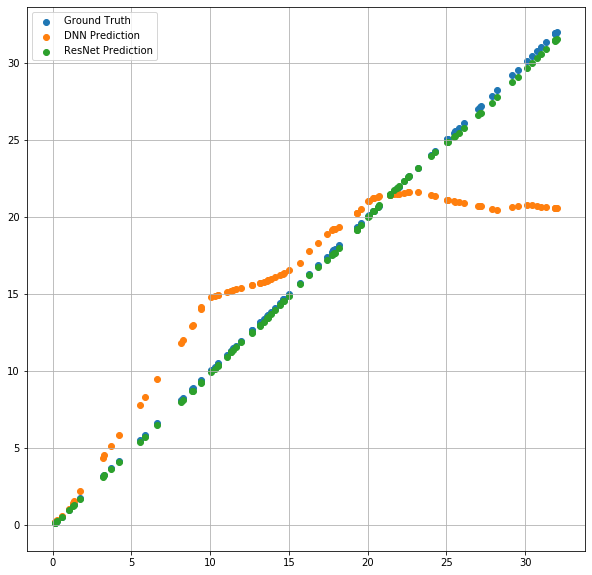

In [117]:
x_test = np.random.rand(data_n, 1, 1) * scale
y_test = x_test
y_pred = model.predict(x_test)
# print(y_pred)
y_pred_res = model_res.predict(x_test)
# print(y_pred_res)
x_test = x_test[:,0,0]
plt.figure(figsize=(10,10))
plt.scatter(x_test, y_test, label="Ground Truth")
plt.scatter(x_test, y_pred, label="DNN Prediction")
plt.scatter(x_test, y_pred_res, label="ResNet Prediction")
plt.legend()
plt.grid()
plt.show()
plt.savefig("smallResNet.eps")